### Data visualization

In [85]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

In [86]:
import seaborn as sns

sns.set_theme(style="darkgrid")

title_fontsize = '25'
default_color = 'tab:blue'

In [87]:
image_folder_path = '../images/aculei-images/'

In [88]:
df = pd.read_csv('../aculei.csv', index_col=0)

In [89]:
df.shape

(16874, 9)

In [90]:
df.head()

,image_name,camera,date_time,date,time,moon,month,year,day
0,TF_ACULEI_8040_DSCF0129.jpg,CAM_1,2021-07-22 23:04:07,2021-07-22,23:04:07,Waning Crescent,2021-07,2021.0,2021-07-22
1,TF_ACULEI_900_DSCF0756.jpg,CAM_1,2021-05-27 22:01:44,2021-05-27,22:01:44,Waning Crescent,2021-05,2021.0,2021-05-27
2,TF_ACULEI_15294_DSCF0133.jpg,NaN,2023-03-30 20:35:58,2023-03-30,20:35:58,Waning Crescent,2023-03,2023.0,2023-03-30
3,TF_ACULEI_11374_DSCF0064.jpg,CAM_6,2022-06-09 21:29:59,2022-06-09,21:29:59,Waning Crescent,2022-06,2022.0,2022-06-09
4,TF_ACULEI_4106_DSCF4336.jpg,CAM_1,2021-06-16 23:41:09,2021-06-16,23:41:09,Full Moon,2021-06,2021.0,2021-06-16


In [91]:
# adding info to plot easier
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')
df['year'] = df['date'].dt.to_period('Y')
df['day'] = df['date'].dt.to_period('d')

In [92]:
df.head()

,image_name,camera,date_time,date,time,moon,month,year,day
0,TF_ACULEI_8040_DSCF0129.jpg,CAM_1,2021-07-22 23:04:07,2021-07-22,23:04:07,Waning Crescent,2021-07,2021,2021-07-22
1,TF_ACULEI_900_DSCF0756.jpg,CAM_1,2021-05-27 22:01:44,2021-05-27,22:01:44,Waning Crescent,2021-05,2021,2021-05-27
2,TF_ACULEI_15294_DSCF0133.jpg,NaN,2023-03-30 20:35:58,2023-03-30,20:35:58,Waning Crescent,2023-03,2023,2023-03-30
3,TF_ACULEI_11374_DSCF0064.jpg,CAM_6,2022-06-09 21:29:59,2022-06-09,21:29:59,Waning Crescent,2022-06,2022,2022-06-09
4,TF_ACULEI_4106_DSCF4336.jpg,CAM_1,2021-06-16 23:41:09,2021-06-16,23:41:09,Full Moon,2021-06,2021,2021-06-16


Some insights about the data

In [93]:
# remove outliers ? 
df = df[df['month'] != '2021-06'].copy()
df = df[df['month'] != '2021-05'].copy()
df = df[df['month'] != '2021-07'].copy()
df = df[df['month'] != '2023-01'].copy()

In [94]:
df.sort_values('date', inplace=True)

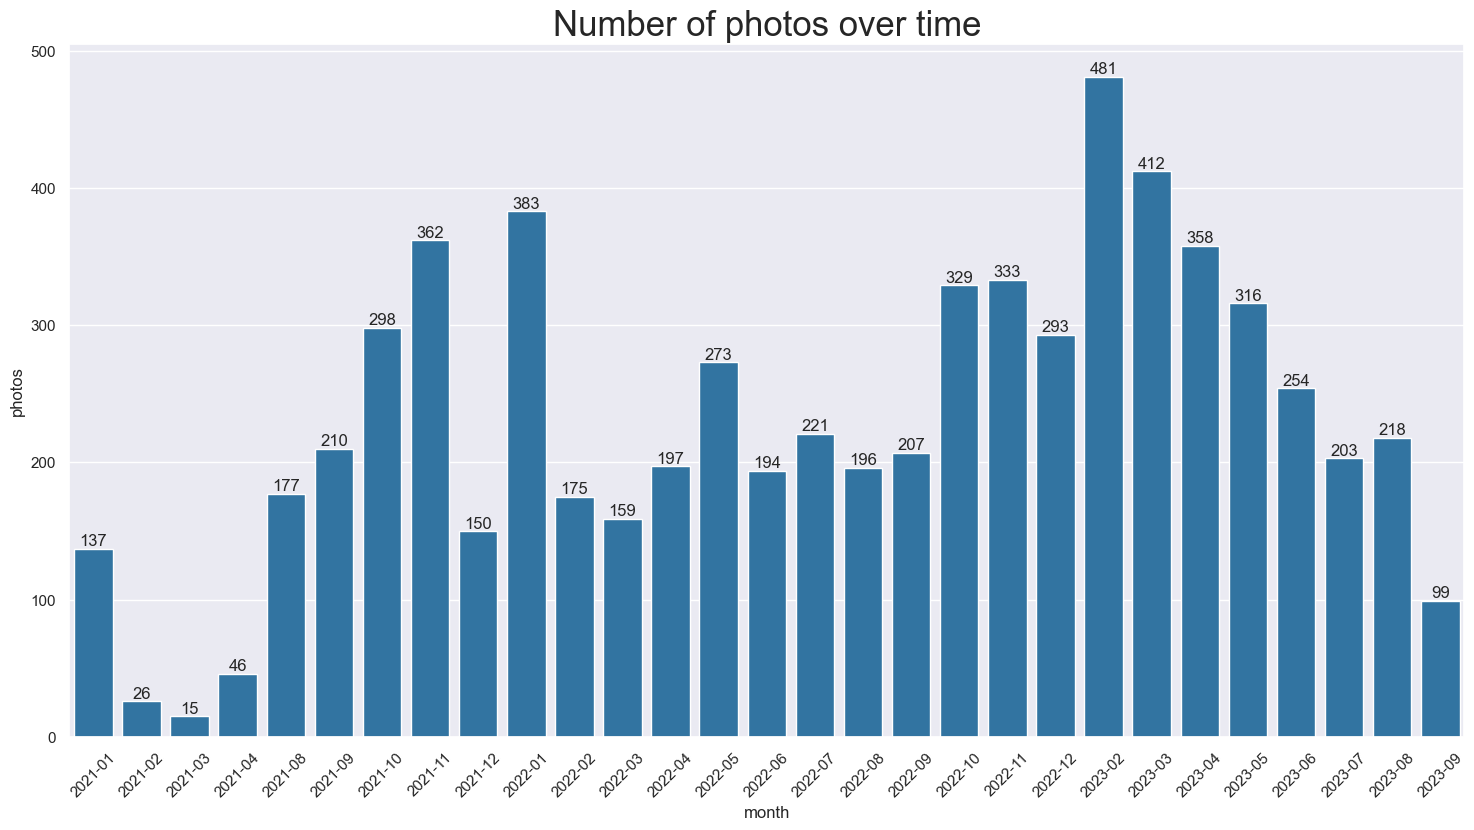

In [95]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='month', color=default_color)

plt.title('Number of photos over time', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

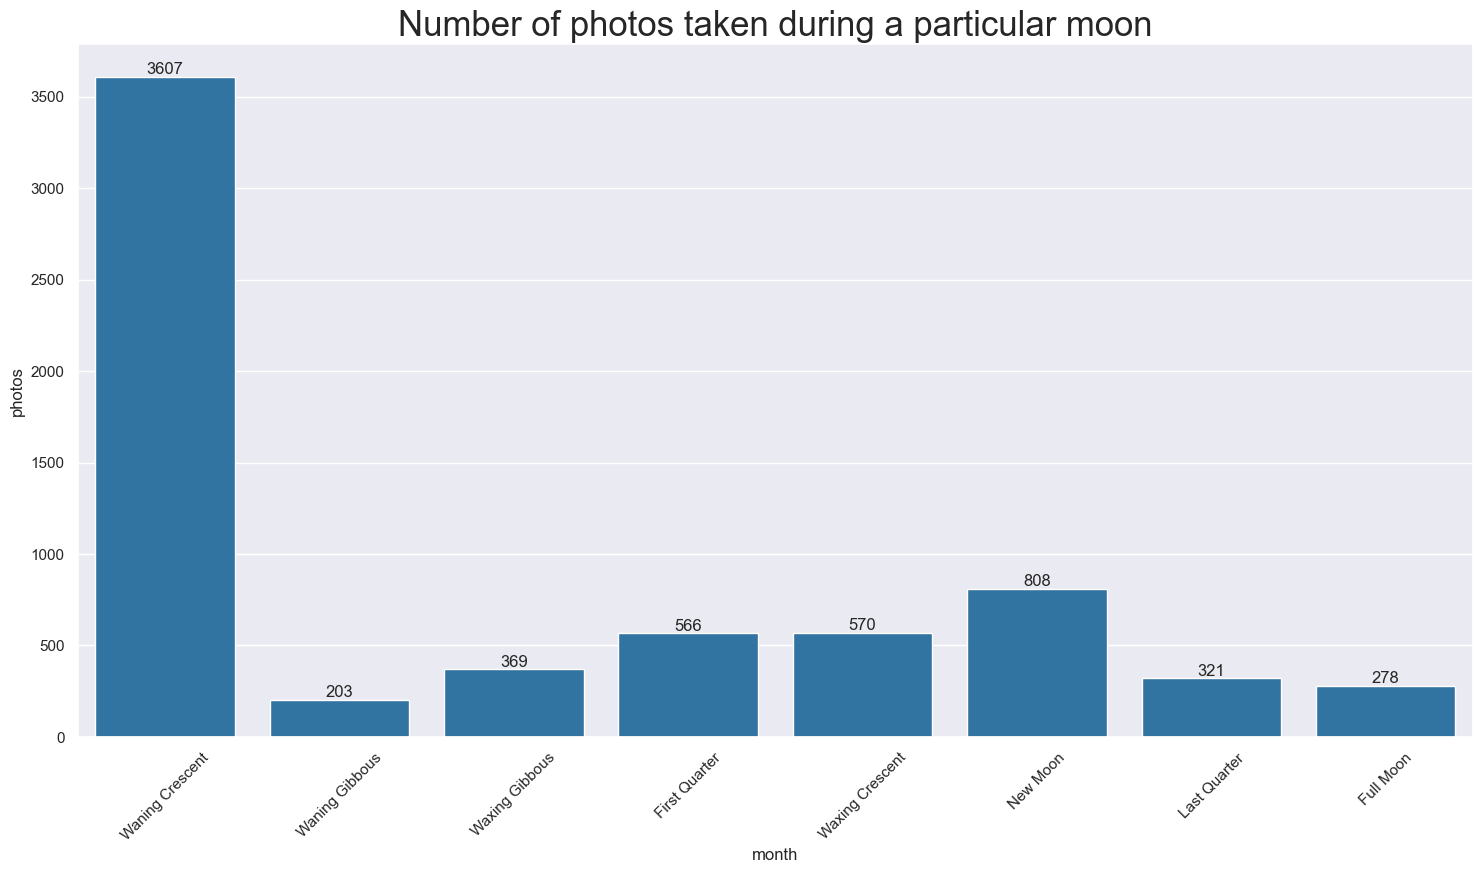

In [96]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='moon', color=default_color)

plt.title('Number of photos taken during a particular moon', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

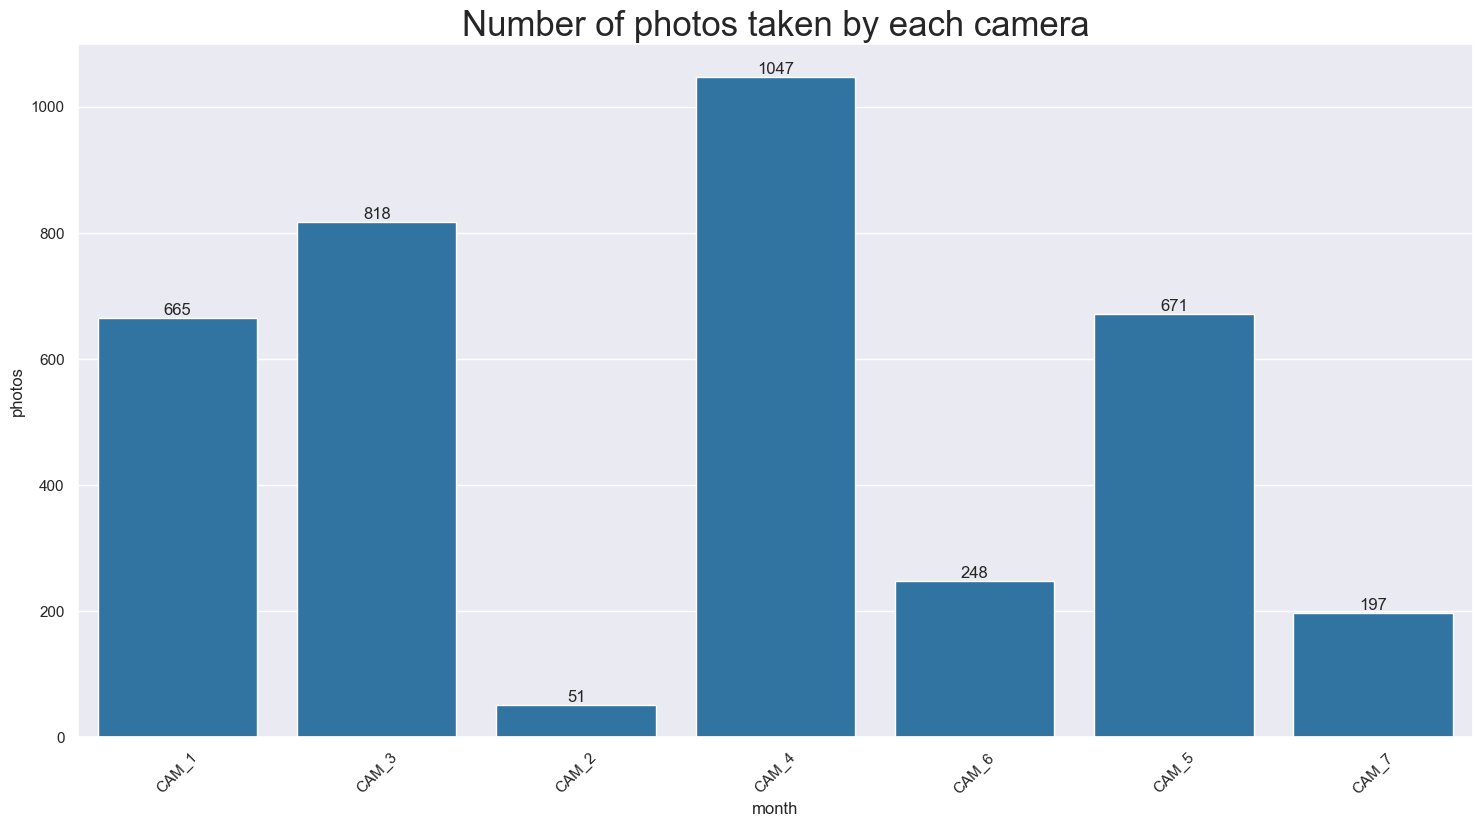

In [114]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='camera', color=default_color)

plt.title('Number of photos taken by each camera', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('month')
plt.xticks(rotation=45)

ax.bar_label(ax.containers[0])
plt.show()

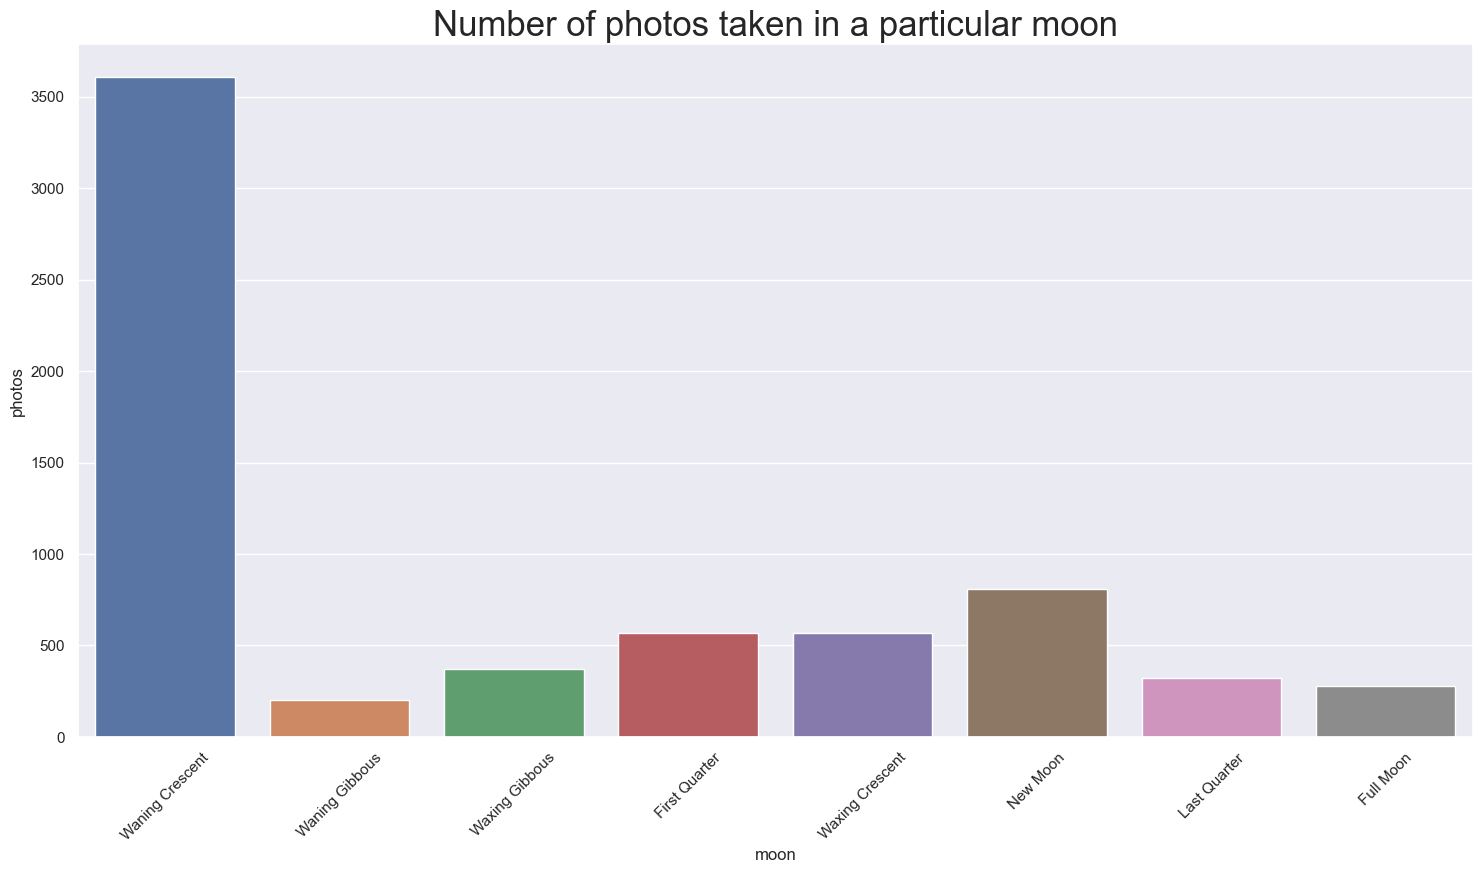

In [116]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='moon')

plt.title('Number of photos taken in a particular moon', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

plt.show()

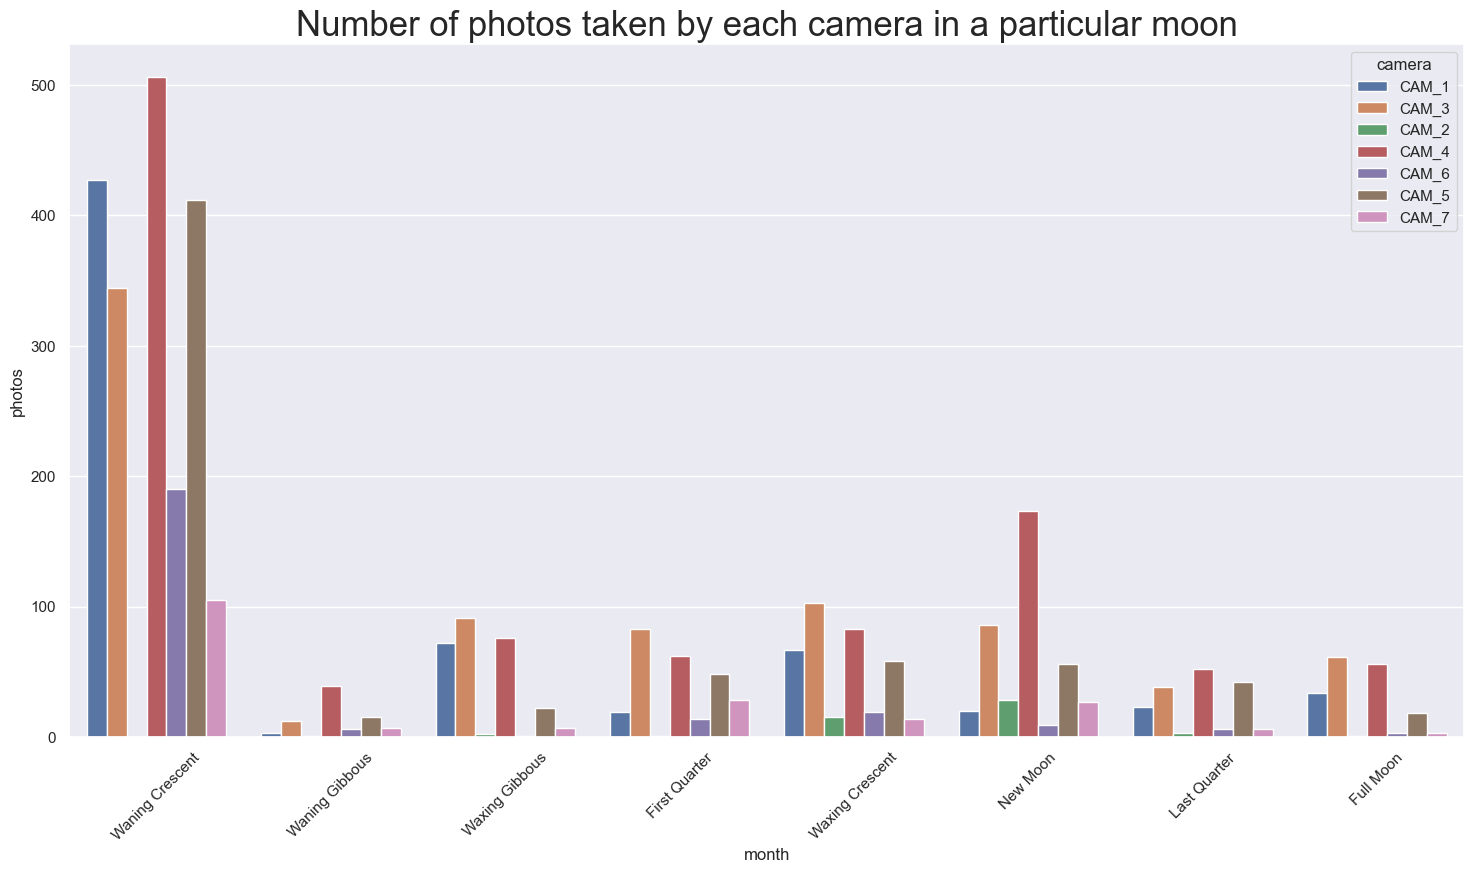

In [103]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(data=df, x='moon', hue='camera')

plt.title('Number of photos taken by each camera in a particular moon', fontsize=title_fontsize)
plt.ylabel('photos')
plt.xlabel('moon')
plt.xticks(rotation=45)

plt.show()

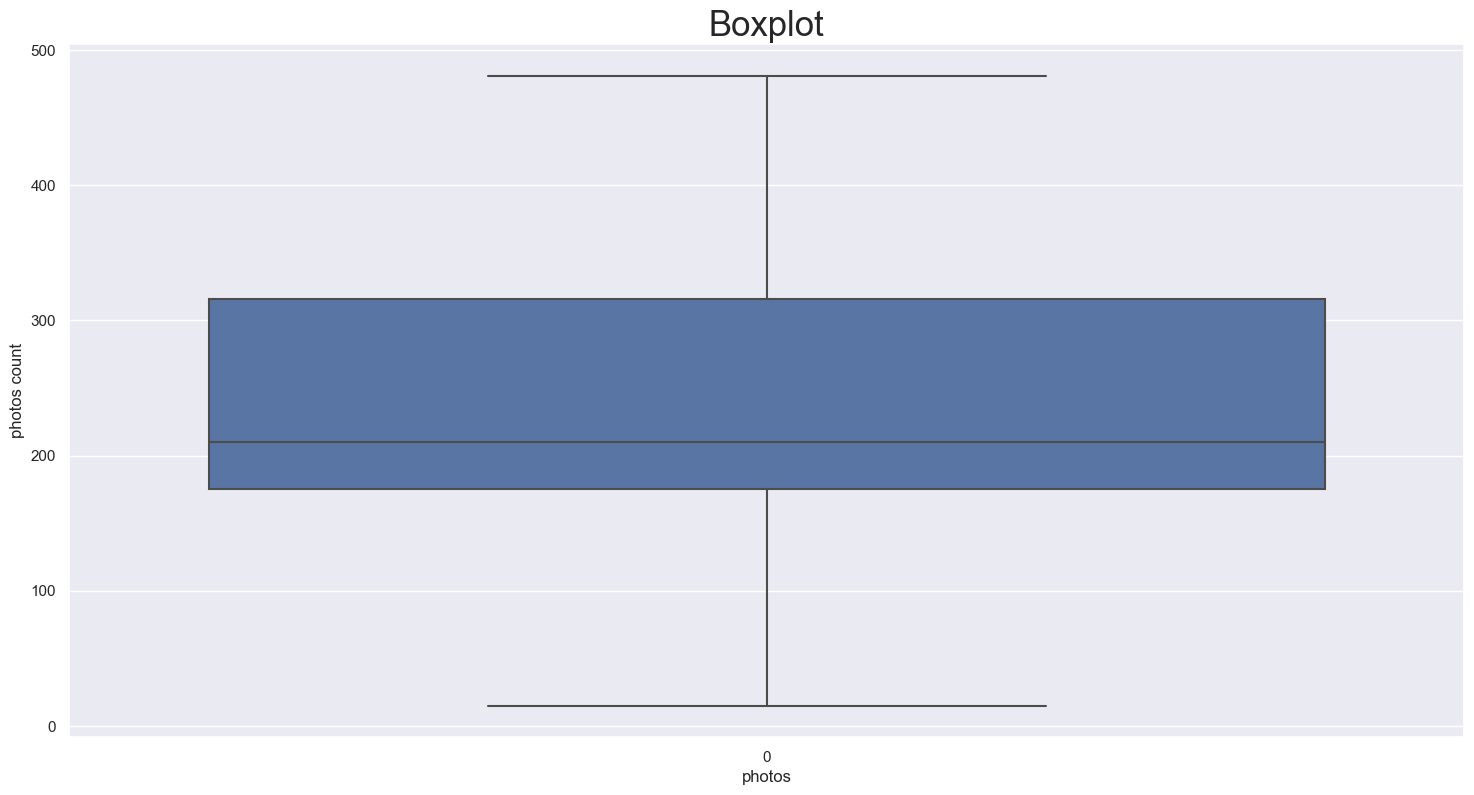

In [99]:
photos_per_month = df.groupby(['month']).size().reset_index(name='photos')
photos_per_month['month'] = photos_per_month['month'].apply(lambda x: str(x)) 

plt.figure(figsize=(18, 9))
ax = sns.boxplot(photos_per_month['photos'])
plt.title('Boxplot', fontsize=title_fontsize)
plt.ylabel('photos count')
plt.xlabel('photos')
plt.show()
